<a href="https://colab.research.google.com/github/KamiyaKanata/prog-8.github.io/blob/main/Copy_of_huntercity_practice_1_kamiyakanata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実践その壱
自分で用意したデータを使って画像分類モデルをトレーニングし、結果を評価する。

## 条件
- 分類してみたい画像を最低3カテゴリー用意する。レッスン2で使用した「グリズリー」「ブラックベア」「テディベア」はNG。各カテゴリー50個以上データサンプルがあること。
- fastaiのライブラリを使用すること


## ヒント
- レッスン2の動画（ https://www.youtube.com/watch?v=MIaAUIc87r4&list=PLPth6MvJU5iFbsl1eNOLV1jJUv2JMjdgg ） を参考にAzureのSearch APIを使ってデータをダウンロードするもよし、こちらの動画（ https://www.youtube.com/watch?v=YZ0czV4N9d0&list=PLPth6MvJU5iEG4Ql3RbKdj7fWWu4JSJmH ）Googleで検索した画像をJavascriptで落とすのも良し。一つ一つ手動でダウロードして一つずつアップロードするも良し。方法は自由です。

### その他
fastaiのバージョンは2.xを使用してください。Google Colabにデフォルトで入っているバージョンは1.0のため、まず最初にfastaiをアップグレードする必要があります。

```
! pip install --upgrade fastai==2.4.1
```

上記実行後、ランタイムを再起動します。GPUを使う設定も忘れずに。

In [2]:
!pip install --upgrade fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# fastaiのバージョンをチェックします。
# 2.x ならokです。

import fastai
fastai.__version__

'2.7.10'

In [3]:
# ここにStudent IDを記載しておいてください。
Student_ID = ""


In [4]:
# import library
from fastai.vision.all import *
import requests 
import requests 
from fastai.vision import *

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import os
from fastai.vision.widgets import*

## 1. 画像を準備する

まず、*data*という名前のディレクトリを作成、更にその中にカテゴリーに対応したディレクトリを作成します。
その後カテゴリーに対応したディレクトリに画像をデータをそれぞれ入れていきます。

以下に例を示します。
```
./data/black/1.jpg
./data/grizzly/4.jpg
./data/teddy/2.jpg
```

例えば```./data/black/```の中にブラックベアの画像が入ることになります。
但し今回は自分で考えたカテゴリーを使うのでblack等はそれに合った名前を使ってください。

In [7]:
# 下記を実行することで、クマのサンプルでテストできます。
# ですが、このアサインメントをパスするには"クマ"以外の自分のデータを自分のスキルでなんとかして用意する必要があります。

# ! wget http://shabelab.com/datasets/bears.tar.gz
# ! tar xvzf bears.tar.gz

In [10]:
key = os.environ.get('AZURE_SEARCH_KEY', 'e0da487a0dc74a419ae01d290b12484d')

In [11]:
def search_images_bing(key, term, max_images: int = 100, **kwargs):    
    params = {'q':term, 'count':max_images}
    headers = {"Ocp-Apim-Subscription-Key":key}
    search_url = "https://api.bing.microsoft.com/v7.0/images/search"
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json() 
   
    # returns an L object to be identical to the original function.
    return L(search_results['value'])

In [12]:
search_images_bing

<function __main__.search_images_bing(key, term, max_images: int = 100, **kwargs)>

In [15]:
results = search_images_bing(key, 'black hair' ,max_images=100)
ims = results.attrgot('contentUrl')
len(ims)

100

In [33]:
results = search_images_bing(key, 'white hair' ,max_images=100)
ims = results.attrgot('contentUrl')
len(ims)

100

In [62]:
results = search_images_bing(key, 'yellow hair' ,max_images=100)
ims = results.attrgot('contentUrl')
len(ims)

100

In [63]:
ims

(#100) ['https://i.redd.it/ypfhjkjpbrv41.jpg','https://i.pinimg.com/originals/f1/3e/b8/f13eb8d4416ea6a97807c68cdbe4cabe.jpg','https://i.pinimg.com/originals/a7/0a/3f/a70a3f63cdca36791e247e6549793c28.jpg','https://i.redd.it/2v2bf4yfp6b41.jpg','https://toppoptoday.com/wp-content/uploads/2019/04/52559119_1287716788053823_4781016493295307854_n.jpg','https://therighthairstyles.com/wp-content/uploads/2021/03/long-bob-with-yellow-ombre.jpg','https://pbs.twimg.com/media/Do2PH6KX4AAfH18.jpg','http://hairdrome.com/wp-content/uploads/2016/11/wavy-yellow-bob-haircuts.jpg','https://i.pinimg.com/originals/ff/0f/ee/ff0feea828da67624c862b3001e95e13.jpg','https://www.okchicas.com/wp-content/uploads/2019/06/Cabello-amarillo-4.jpg'...]

In [28]:
ims = ['https://i.pinimg.com/736x/18/f0/ba/18f0ba0c1c8f36915072fcd746338625--yellow-hair-color-hair-colours.jpg','https://i.redd.it/ypfhjkjpbrv41.jpg','http://hairdrome.com/wp-content/uploads/2016/11/long-yellow-hairstyles.jpg','https://www.sumcoco.com/wp-content/uploads/2019/05/yellow-ombre-color-31.jpg','https://i.pinimg.com/originals/2a/8b/58/2a8b581b7904829a17f9382de548cfb3.jpg','https://i.pinimg.com/originals/c1/2a/c5/c12ac5e6b9e95619491225865012dd0d.jpg','http://hairdrome.com/wp-content/uploads/2016/11/cool-yellow-hairstyles.jpg','http://hairdrome.com/wp-content/uploads/2016/11/sunshine-yellow-hair-colors.jpg','https://content.latest-hairstyles.com/wp-content/uploads/best-yellow-hair-colors.jpg','https://i.pinimg.com/736x/25/41/2a/25412a3341c6e0aeb7dd283aab3738a0.jpg']

In [13]:
from fastdownload import download_url

In [17]:
dest = 'data/person/black'
download_url(ims[0], dest)

Path('data/person/black')

In [35]:
dest='data/person/white'
download_url(ims[0],dest)

Path('data/person/white')

In [64]:
dest='data/person/yellow'
download_url(ims[0],dest)

Path('data/person/yellow')

In [65]:
for item in ims:
  print(ims)

['https://i.redd.it/ypfhjkjpbrv41.jpg', 'https://i.pinimg.com/originals/f1/3e/b8/f13eb8d4416ea6a97807c68cdbe4cabe.jpg', 'https://i.pinimg.com/originals/a7/0a/3f/a70a3f63cdca36791e247e6549793c28.jpg', 'https://i.redd.it/2v2bf4yfp6b41.jpg', 'https://toppoptoday.com/wp-content/uploads/2019/04/52559119_1287716788053823_4781016493295307854_n.jpg', 'https://therighthairstyles.com/wp-content/uploads/2021/03/long-bob-with-yellow-ombre.jpg', 'https://pbs.twimg.com/media/Do2PH6KX4AAfH18.jpg', 'http://hairdrome.com/wp-content/uploads/2016/11/wavy-yellow-bob-haircuts.jpg', 'https://i.pinimg.com/originals/ff/0f/ee/ff0feea828da67624c862b3001e95e13.jpg', 'https://www.okchicas.com/wp-content/uploads/2019/06/Cabello-amarillo-4.jpg', 'https://i.pinimg.com/originals/5d/1b/3d/5d1b3da7c175279022d3bdaabaa0326d.jpg', 'https://i.pinimg.com/originals/97/3d/15/973d158a50d9aafc8a8e0fa6485a240b.jpg', 'https://i.redd.it/ju250wotc1a41.jpg', 'http://hairdrome.com/wp-content/uploads/2016/11/cool-yellow-hairstyles.jpg

In [66]:
dest

'data/person/yellow'

In [153]:
! ls -l data/person/black/black.jpg

-rw-r--r-- 1 root root 77246 Feb  4 06:45 data/person/black/black.jpg


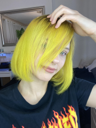

In [67]:
im = Image.open(dest)
im.to_thumb(128,128)

In [68]:
person_types = 'black','white','yellow'
path = Path('person')

In [69]:
if not path.exists():
    path.mkdir()
    for o in person_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} person')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [70]:
! ls person/yellow

 09bd8c9d-f09f-4bfe-a5aa-470d34f1eef2.png
 09f664fa-49d2-418f-8f72-8ac10929c818.png
 0a316e1e-de52-47f3-ae70-62803d49884b.jpg
 0af8fb46-3511-4317-8c21-391221b81077.png
 0d5790ab-9539-4209-8d87-0540c30255e9.jpg
 10ceacd7-07a0-458b-a41a-e1caa6fe782b.jpg
 14b476f3-868e-453f-a916-0bebfab137dd.jpg
 14cb890d-c70c-4a35-b0d4-7c1da717950c.jpg
 1a15a15b-2c39-40d7-8d87-1125dd05513c.png
 1ca6707a-74e3-4985-82f5-de0a17e5187d.png
 1eca5ae6-2b2d-42f8-9806-c027513b65e1.jpg
 2013a310-2589-4a24-92f9-42962d8c266e.png
 20425217-dde2-4e10-a4f6-be0ba0aa4868.jpg
 205e7424-391d-45a5-96b3-14df618af20a.jpg
 20652575-fe49-494d-83ff-0a0ea3d99609.png
 22f2054f-f968-4951-ad80-d644eac56203.jpg
 28b2a67c-29f4-4d6c-8f9f-f2c6bd93f751.jpg
 2bb133d7-f48c-47ba-a267-e503669258ca.jpg
 2eebf6db-7a8c-47f7-b4f7-e1b434ade54b.png
 38543776-f78b-4325-a9c2-45162ac5d2fb.jpg
 3c08ee90-0bce-4104-a28f-3995564020a3.png
 421efda3-58f6-4147-bad2-7bfa2c0f390d.jpg
 464edf92-25eb-41db-b5c5-51d832043eec.png
 47796a7b-c4e9-48bd-974c-c38a7f22d

In [71]:
path

Path('person')

In [72]:
fns=get_image_files(path)
fns

(#238) [Path('person/yellow/a854c010-cdb9-4efc-9d38-3d67bb0b34e9.png'),Path('person/yellow/52ac19d5-7968-4eb0-9c11-fac126e1642a.png'),Path('person/yellow/dbc7fdbd-1377-41a0-9a18-afb344902a69.jpg'),Path('person/yellow/5267c243-9bad-4bba-8679-3e8190296cd8.jpg'),Path('person/yellow/8eb5921a-cb67-44bf-b8cd-dbacac3be59d.jpg'),Path('person/yellow/7cb5ea61-fb99-4ad7-9c07-ea5b4fa740d2.png'),Path('person/yellow/09bd8c9d-f09f-4bfe-a5aa-470d34f1eef2.png'),Path('person/yellow/a45c2175-7c6d-468c-b0f0-a4ba3b4298d1.jpg'),Path('person/yellow/0a316e1e-de52-47f3-ae70-62803d49884b.jpg'),Path('person/yellow/f9c60241-0300-406a-9cde-d94c487ca531.png')...]

In [73]:
len(fns)

238

In [74]:
failed = verify_images(fns)
failed
failed.map(Path.unlink);

## 2. データセットを設定し、学習を行う
以下は各セルを順番に実行していくだけでokです。

*学習のヒント:*
将来類似の問題に出くわした際は、似た様な問題を暑かったnotebooksやgithubのプロジェクトを探し、それを変更して解決できないか試してみましょう。データを変えるだけで解決できることは少ないですが、そこが出発点として使える事は多いです。

In [75]:
# datablock
person = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [77]:
dls = person.dataloaders(path)

In [78]:
# prepare dataloaders
dls = person.dataloaders("./data")

TypeError: ignored

In [79]:
dls??


In [80]:
# train 
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.670157,1.163913,0.404255,00:45


epoch,train_loss,valid_loss,error_rate,time
0,1.314184,0.776521,0.297872,00:47
1,1.104358,0.614220,0.212766,00:50
2,0.994964,0.589903,0.170213,00:49
3,0.854399,0.557525,0.148936,00:46


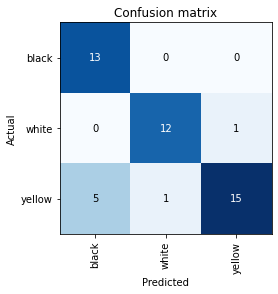

In [81]:
# evaluate training
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [82]:
# save 
learn.export()

In [84]:
!ls 

data  export.pkl  person  sample_data


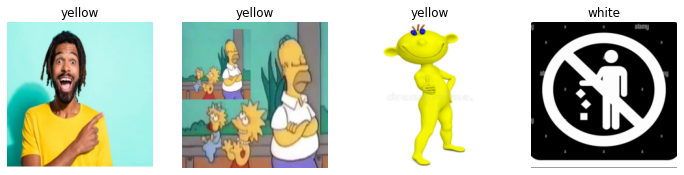

In [83]:
dls.valid.show_batch(max_n=4,nrows=1)

In [85]:
learn_inf=load_learner('export.pkl')

In [90]:
learn_inf.predict('data/person/black')

('black', TensorBase(0), TensorBase([0.9714, 0.0051, 0.0236]))

In [92]:
learn_inf.dls.vocab

['black', 'white', 'yellow']

In [99]:

path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict('data/person/black')
learn_inf.dls.vocab
     

['black', 'white', 'yellow']

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. テスト
学習で使わなかった画像を一つ用意しアップロードします。  
その後、保存したモデルをロードし、どんな推論結果が出るかテストしてみましょう。

ここではtest.jpgという名前で保存しています。

In [112]:
# 画像を一つアップロードする。
# 以下はクマの例です。アサインメントでは自分のデータに合うサンプルを用意する必要があります。

! wget /0_Portrait-Of-Young-Woman.jpg -O test.jpg


/0_Portrait-Of-Young-Woman.jpg: Scheme missing.


In [113]:
# load model
learn_inf = load_learner('export.pkl')

In [114]:
# upload image 
test_image = "/0_Portrait-Of-Young-Woman.jpg"

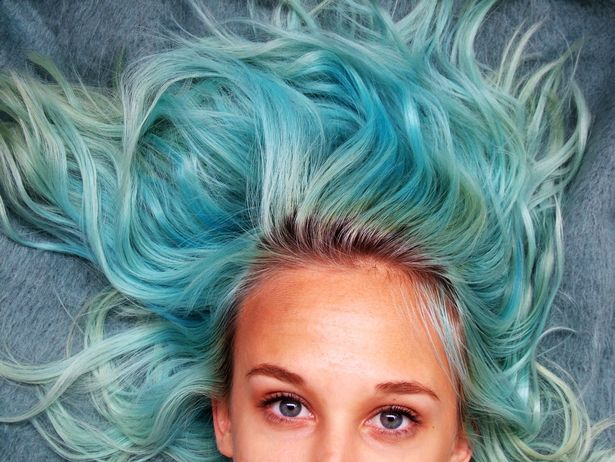

In [115]:
from IPython.display import Image
Image(filename=test_image) 

In [116]:
# test model
learn_inf.predict(test_image)

('yellow', TensorBase(2), TensorBase([0.3222, 0.0633, 0.6145]))